## **LEFT JOIN** | **RIGHT JOIN** | **INNER JOIN** | **OUTER JOIN** | **LEFT ANTI-JOIN** | **RIGHT ANTI-JOIN** | **FULL ANTI-JOIN** 

In [55]:
import pandas as pd
df1 = pd.DataFrame(
    [
       (1, 345, 'B', True),
       (2, 100, 'C', False),
       (3, 300, 'B', False),
       (4, 151, 'A', False),
       (5, 212, 'A', True),
       (6, 121, 'C', False),
       (7, 333, 'B', True),
       (8, 456, 'C', True),
    ],
    columns=['id', 'value', 'colC', 'colD']
                  )
df2 = pd.DataFrame(
    [
       (1, 111, 10.1, 3),
       (9, 56, 3.33, 10),
       (10, 17, 18.0, 8),
       (3, 567, 19.1, 4),
       (11, 98, 2.1, 1),
       (6, 31, 3.14, 12),
    ],
    columns=['id', 'value', 'colE', 'colF']
                  )
print(df1)

   id  value colC   colD
0   1    345    B   True
1   2    100    C  False
2   3    300    B  False
3   4    151    A  False
4   5    212    A   True
5   6    121    C  False
6   7    333    B   True
7   8    456    C   True


In [56]:
print(df2)

   id  value   colE  colF
0   1    111  10.10     3
1   9     56   3.33    10
2  10     17  18.00     8
3   3    567  19.10     4
4  11     98   2.10     1
5   6     31   3.14    12


# **Inner Join**

---
An INNER JOIN between two pandas DataFrames will result into a set of records that have a mutual value in the specified joining column(s).
In order to perform an inner join between two DataFrames using a single column, all we need is to provide the on argument when calling merge().

`df1.merge(df2, on='id')`

Note that by default, the merge() method performs an inner join (how='inner') and thus you don’t have to specify the join type explicitly. The output will contain all the records that have a mutual id in both df1 and df2.

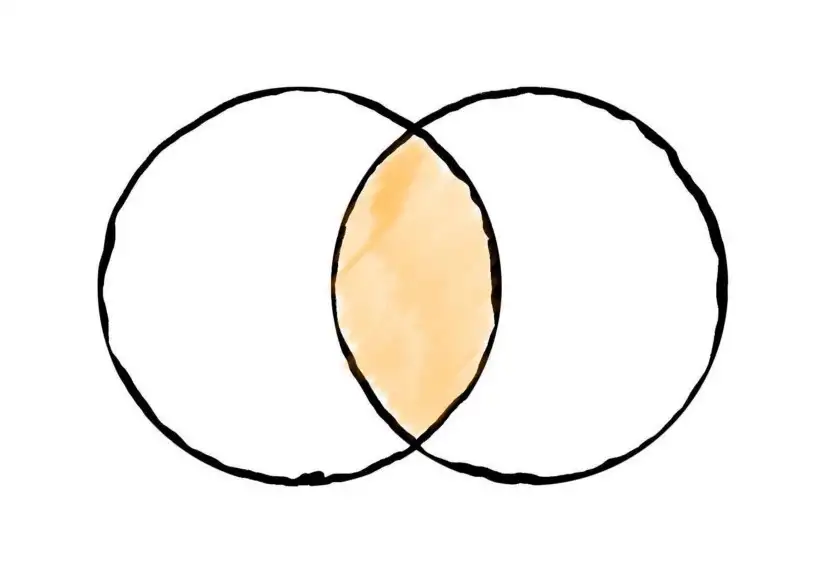

In [57]:
inner=df1.merge(df2, on='id',suffixes=('_df1','_df2'))
print(inner)

   id  value_df1 colC   colD  value_df2   colE  colF
0   1        345    B   True        111  10.10     3
1   3        300    B  False        567  19.10     4
2   6        121    C  False         31   3.14    12


# **Left Join**

---

The LEFT JOIN (or LEFT OUTER JOIN) will take all the records from the left DataFrame along with records from the right DataFrame that have matching values with the left one, over the specified joining column(s).

Any missing value from the records of the right DataFrame that are included in the result, will be replaced with NaN.

To perform a left join between two pandas DataFrames, you now to specify how='left' when calling merge().

`df1.merge(df2, on='id', how='left')`

As mentioned, the resulting DataFrame will contain every record from the left DataFrame along with the corresponding values from the right DataFrame for these records that match the joining column. The remaining column values of the result for these records that didn’t match with a record from the right DataFrame will be replaced by NaNs.

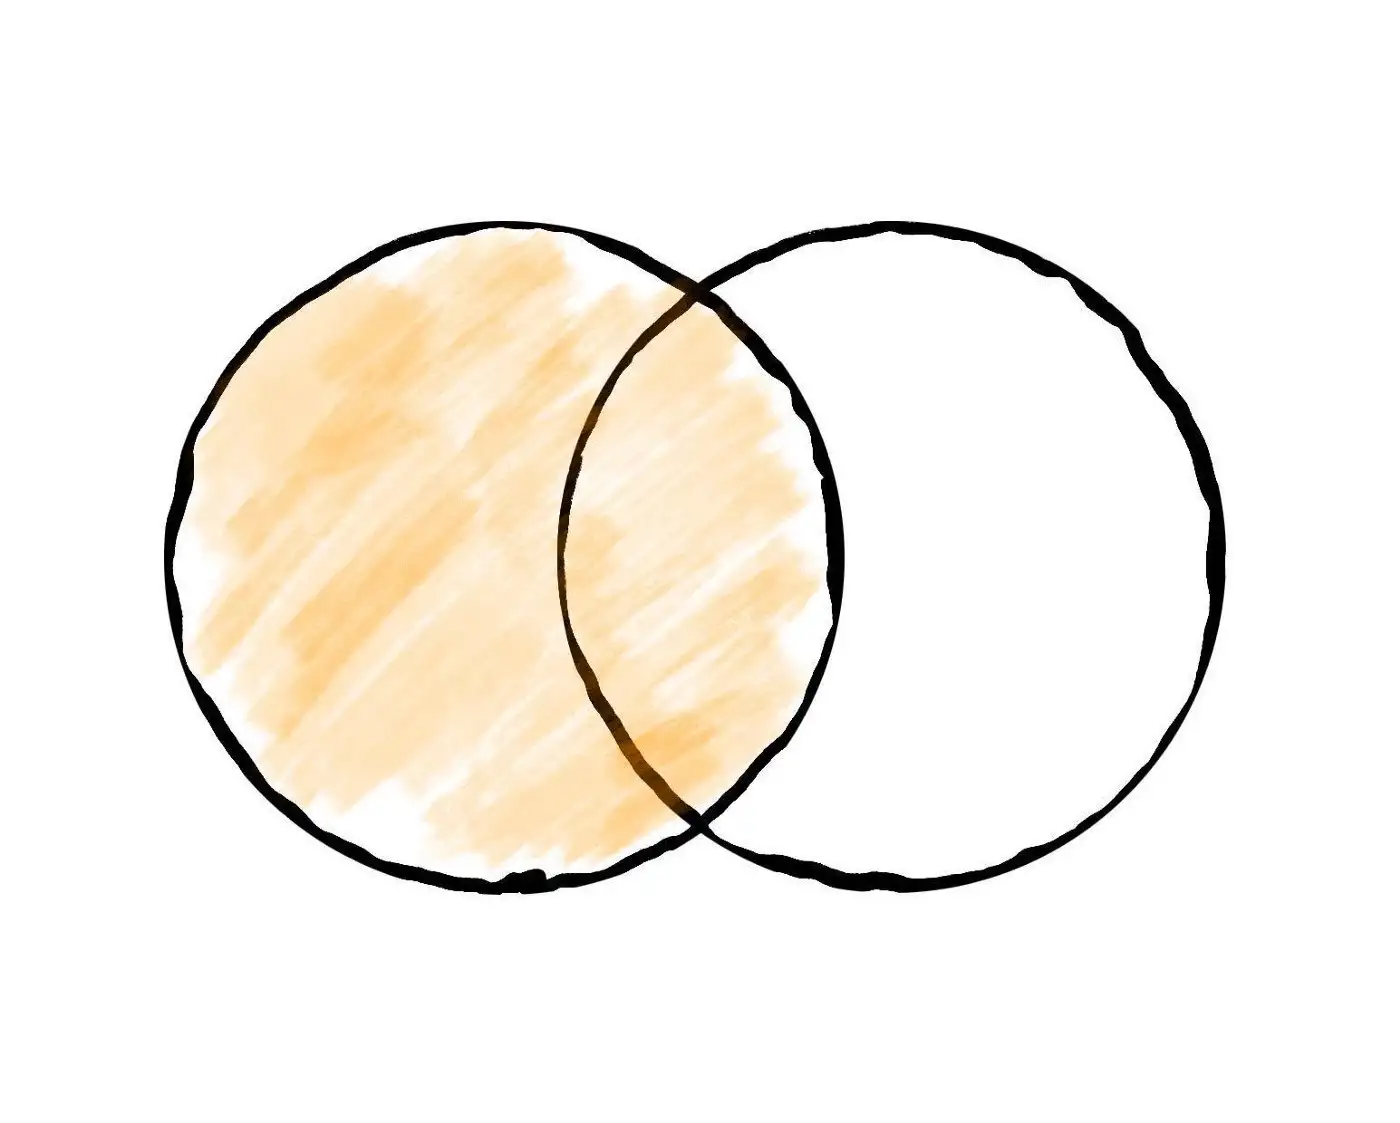

In [58]:
left=df1.merge(df2,on='id',how='left',suffixes=('_df1','_df2'))
print(left.fillna('a'))

   id  value_df1 colC   colD value_df2  colE  colF
0   1        345    B   True     111.0  10.1   3.0
1   2        100    C  False         a     a     a
2   3        300    B  False     567.0  19.1   4.0
3   4        151    A  False         a     a     a
4   5        212    A   True         a     a     a
5   6        121    C  False      31.0  3.14  12.0
6   7        333    B   True         a     a     a
7   8        456    C   True         a     a     a


# **Right Join**

---



The RIGHT JOIN will take all the records from the right DataFrame along with records from the left DataFrame that have matching values with the right one, over the specified joining column(s).

Any missing value from the records of the left DataFrame that are included in the result, will be replaced with NaN.

To perform a left join between two pandas DataFrames, you now to specify how='right' when calling merge().

`df1.merge(df2, on='id', how='right')`

The result of a right join between df1 and df2 DataFrames is shown below.

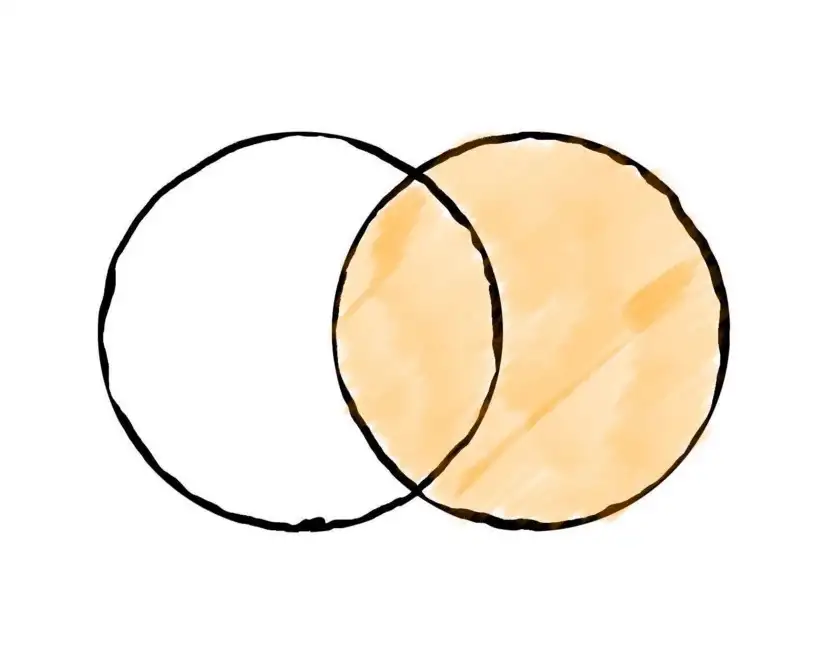

In [59]:
right=df1.merge(df2, on='id',how='right',suffixes=('_df1','_df2'))
print(right)

   id  value_df1 colC   colD  value_df2   colE  colF
0   1      345.0    B   True        111  10.10     3
1   9        NaN  NaN    NaN         56   3.33    10
2  10        NaN  NaN    NaN         17  18.00     8
3   3      300.0    B  False        567  19.10     4
4  11        NaN  NaN    NaN         98   2.10     1
5   6      121.0    C  False         31   3.14    12


# **OUTER JOIN**

---



The FULL OUTER JOIN will essentially include all the records from both the left and right DataFrame. This type of join will uses the keys from both frames — for any missing rows, NaN values will be inserted.
To perform a full outer join between two pandas DataFrames, you now to specify how='outer' when calling merge().

`df1.merge(df2, on='id', how='outer')`

The output of a full outer join using our two example frames is shown below.

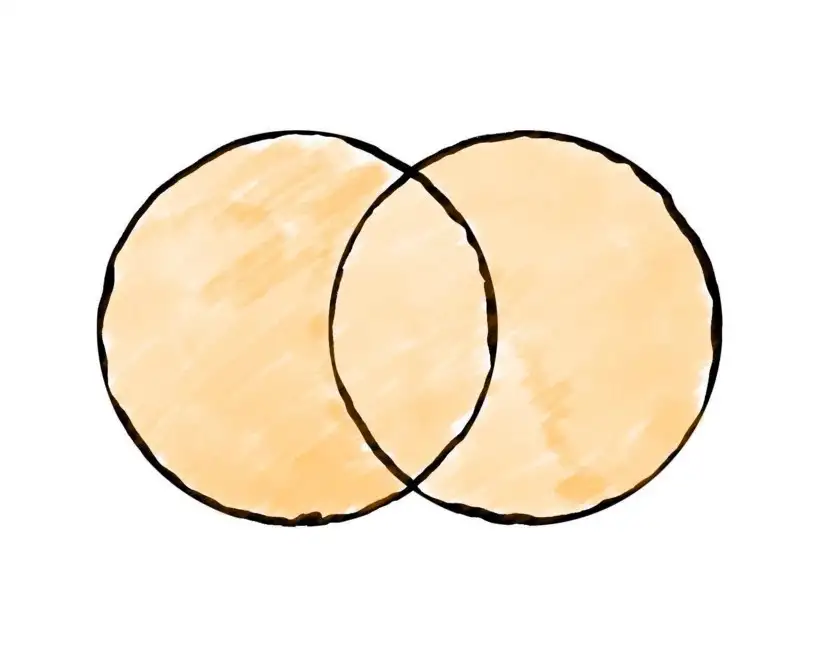

In [60]:
outer=df1.merge(df2,on='id',how='outer',suffixes=('_df1','_df2'))
print(outer)

    id  value_df1 colC   colD  value_df2   colE  colF
0    1      345.0    B   True      111.0  10.10   3.0
1    2      100.0    C  False        NaN    NaN   NaN
2    3      300.0    B  False      567.0  19.10   4.0
3    4      151.0    A  False        NaN    NaN   NaN
4    5      212.0    A   True        NaN    NaN   NaN
5    6      121.0    C  False       31.0   3.14  12.0
6    7      333.0    B   True        NaN    NaN   NaN
7    8      456.0    C   True        NaN    NaN   NaN
8    9        NaN  NaN    NaN       56.0   3.33  10.0
9   10        NaN  NaN    NaN       17.0  18.00   8.0
10  11        NaN  NaN    NaN       98.0   2.10   1.0


# **LEFT ANTI-JOIN**

A LEFT ANTI-JOIN will contain all the records of the left frame whose keys don’t appear in the right frame.

A left anti-join in pandas can be performed in **two steps**. In the first step, we need to perform an **OUTER JOIN** with `indicator=True:`

indicator bool or str, default False

If True, adds a column to the output DataFrame called '_merge' with information on the source of each row. The column can be given a different name by providing a string argument. The column will have a Categorical type with the value of 'left_only' for observations whose merge key only appears in the left DataFrame, 'right_only' for observations whose merge key only appears in the right DataFrame, and 'both' if the observation’s merge key is found in both DataFrames.

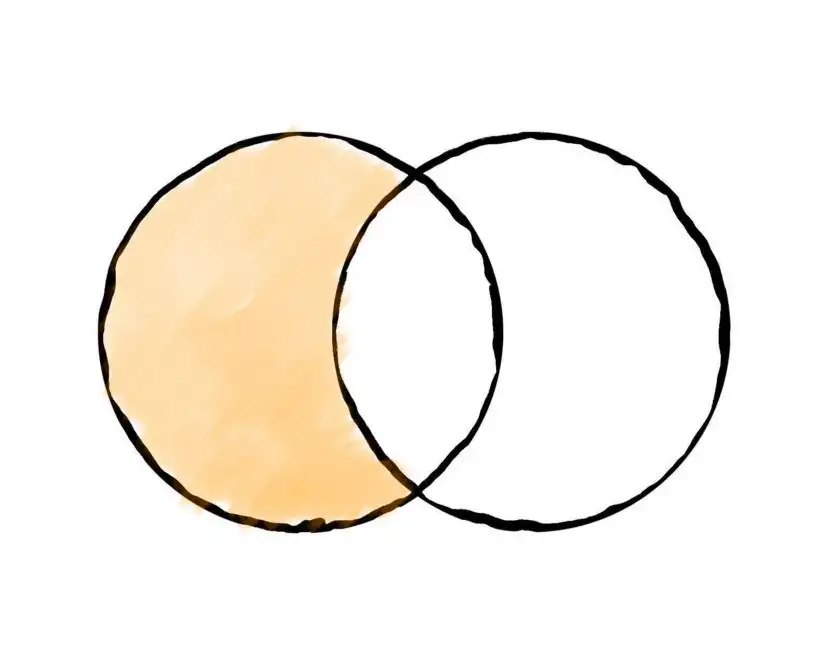

**1st step:**

`outer=df1.merge(df2, on='id', how='outer', indicator=True)`

In [61]:
outer=df1.merge(df2,on='id',how='outer',indicator=True,suffixes=('_df1','_df2'))
print(outer)

    id  value_df1 colC   colD  value_df2   colE  colF      _merge
0    1      345.0    B   True      111.0  10.10   3.0        both
1    2      100.0    C  False        NaN    NaN   NaN   left_only
2    3      300.0    B  False      567.0  19.10   4.0        both
3    4      151.0    A  False        NaN    NaN   NaN   left_only
4    5      212.0    A   True        NaN    NaN   NaN   left_only
5    6      121.0    C  False       31.0   3.14  12.0        both
6    7      333.0    B   True        NaN    NaN   NaN   left_only
7    8      456.0    C   True        NaN    NaN   NaN   left_only
8    9        NaN  NaN    NaN       56.0   3.33  10.0  right_only
9   10        NaN  NaN    NaN       17.0  18.00   8.0  right_only
10  11        NaN  NaN    NaN       98.0   2.10   1.0  right_only


**2nd step:**




```
left_anti_join = outer[(outer._merge=='left_only')].drop('_merge', axis=1)
```




In [62]:
antileft=outer[(outer._merge=='left_only')].drop('_merge', axis=1)
print(antileft)

   id  value_df1 colC   colD  value_df2  colE  colF
1   2      100.0    C  False        NaN   NaN   NaN
3   4      151.0    A  False        NaN   NaN   NaN
4   5      212.0    A   True        NaN   NaN   NaN
6   7      333.0    B   True        NaN   NaN   NaN
7   8      456.0    C   True        NaN   NaN   NaN


# **RIGHT ANTI-JOIN**

---



Similarly, a RIGHT ANTI-JOIN will contain all the records of the right frame whose keys don’t appear in the left frame.

Same as left anti join. Firstly we have to perform outer join with indicator and then from outer join, we perform right anti join.

`right_anti_join = outer[(outer._merge=='right_only')].drop('_merge', axis=1)`

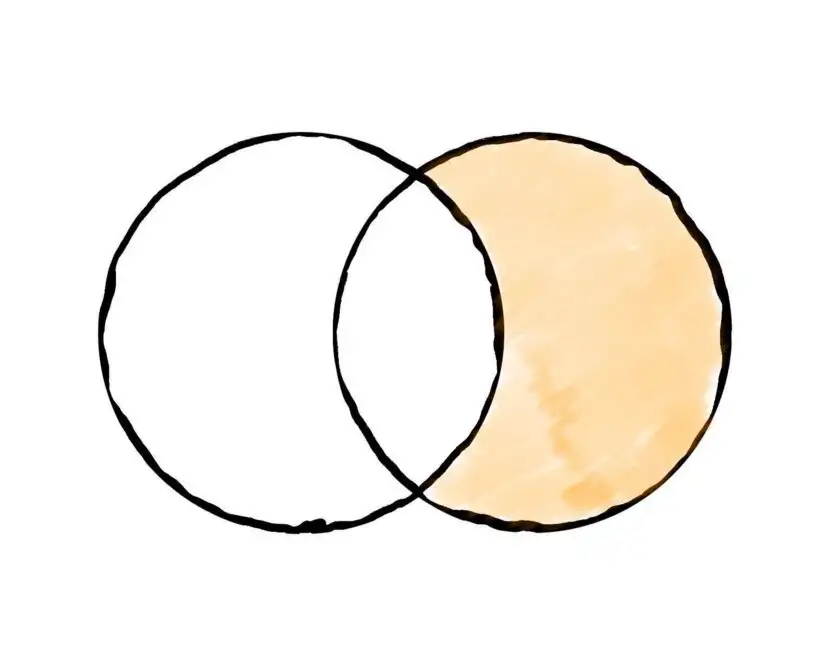

In [63]:
right_anti_join = outer[(outer._merge=='right_only')].drop('_merge', axis=1)
print(right_anti_join)

    id  value_df1 colC colD  value_df2   colE  colF
8    9        NaN  NaN  NaN       56.0   3.33  10.0
9   10        NaN  NaN  NaN       17.0  18.00   8.0
10  11        NaN  NaN  NaN       98.0   2.10   1.0


# **FULL ANTI-JOIN**

---



A FULL ANTI-JOIN will contain all the records from both the left and right frames that don’t have any common keys.

Again, this can be performed in two steps like the two previous anti-join types we discussed. After performing outer join with indicator,

`anti_join = outer[(outer._merge!='both')].drop('_merge', axis=1)`

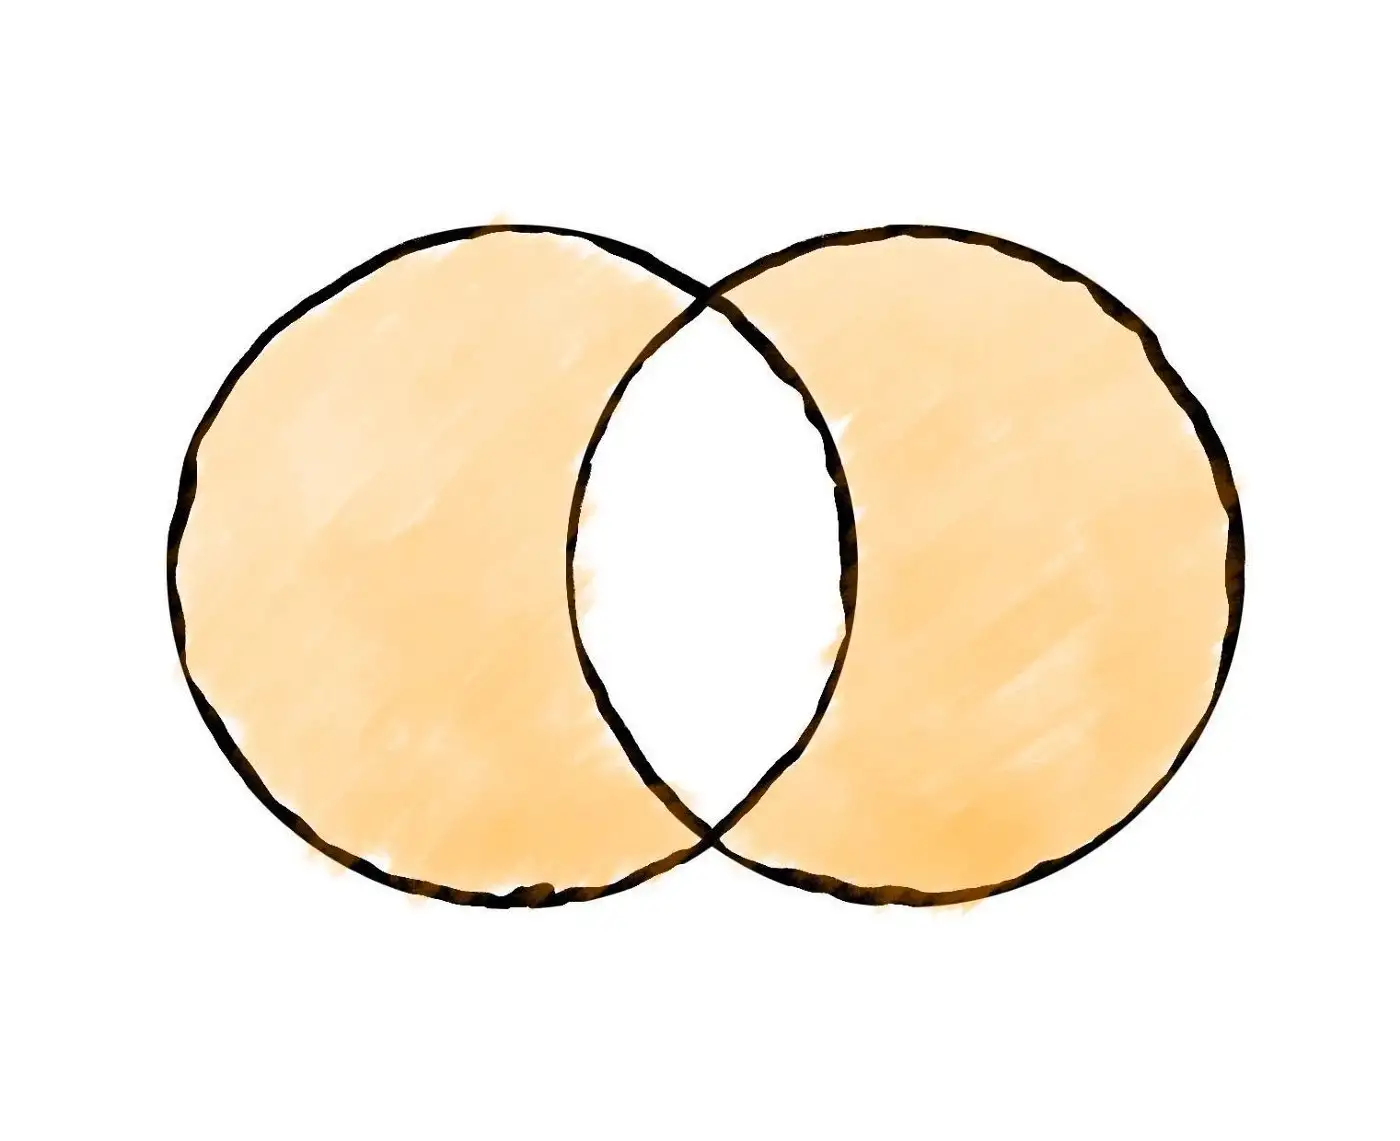

In [64]:
anti_join = outer[(outer._merge!='both')].drop('_merge', axis=1)
print(anti_join)

    id  value_df1 colC   colD  value_df2   colE  colF
1    2      100.0    C  False        NaN    NaN   NaN
3    4      151.0    A  False        NaN    NaN   NaN
4    5      212.0    A   True        NaN    NaN   NaN
6    7      333.0    B   True        NaN    NaN   NaN
7    8      456.0    C   True        NaN    NaN   NaN
8    9        NaN  NaN    NaN       56.0   3.33  10.0
9   10        NaN  NaN    NaN       17.0  18.00   8.0
10  11        NaN  NaN    NaN       98.0   2.10   1.0


# **Merging on different column names**

---



Now let’s consider another use-case, where the columns that we want to merge two pandas DataFrames don’t have the same name. In this case, instead of providing the on argument, we have to provide left_on and right_on arguments to specify the columns of the left and right DataFrames to be considered when merging them together.

As an example, let’s suppose we want to merge df1 and df2 based on the **id** and **colF** columns respectively. The following command will do the trick:

`df1.merge(df2, left_on='id', right_on='colF')`

In [67]:
print(df1.merge(df2, left_on='id', right_on='colF',suffixes=('_df1','_df2')))

   id_df1  value_df1 colC   colD  id_df2  value_df2  colE  colF
0       1        345    B   True      11         98   2.1     1
1       3        300    B  False       1        111  10.1     3
2       4        151    A  False       3        567  19.1     4
3       8        456    C   True      10         17  18.0     8


# **Merging on multiple columns**

---



If you want to merge on multiple columns, you can simply pass all the desired columns into the on argument as a list:

`df1.merge(df2, on=['colA', 'colB', ..])`

If the columns in the left and right frame have different names then once again, you can make use of right_on and left_on arguments:

`df1.merge(df2, left_on=['colA', 'colB'], right_on=['colC', 'colD])`

# **Selecting only some of the columns from the DataFrames involved**

---



Now let’s say that we want to merge together frames df1 and df2 using a left outer join, select all the columns from df1 but only column colE from df2.

In order to do so, you can simply use a subset of df2 columns when passing the frame into the merge() method.

`df1.merge(df2[['id', 'colE']], on='id')`

This is going to exclude all columns but colE from the right frame

In [68]:
print(df1.merge(df2[['id', 'colE']], on='id'))

   id  value colC   colD   colE
0   1    345    B   True  10.10
1   3    300    B  False  19.10
2   6    121    C  False   3.14
